### ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† ÌïôÏäµÌï¥Î¥ÖÏãúÎã§.

ÏïÑÎûò ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌÜµÌï¥ Í∏àÏúµ Îç∞Ïù¥ÌÑ∞Î•º ÏâΩÍ≤å Î∞õÏùÑ Ïàò ÏûàÏäµÎãàÎã§

https://pydata.github.io/pandas-datareader/stable/index.html

Ïù¥Î≤àÏóêÎäî Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï¥ÏÑú 5ÏùºÍ∞ÑÏùò CloseÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [21]:
import pandas_datareader.data as web  # Í∏àÏúµ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Í∞ÄÎä•Ìïú ÎùºÏù¥Î∏åÎü¨Î¶¨

df = web.DataReader('005930', 'naver', start='2020-01-01')  # naverÎäî Îç∞Ïù¥ÌÑ∞ ÏÜåÏä§, Ï¢ÖÎ™© ÏΩîÎìúÏóê Ìï¥ÎãπÌïòÎäî Ï¢ÖÎ™©Ïù¥ ÎÇòÏò¥

In [22]:
df.head()

Open   High    Low  Close    Volume
Date                                            
2020-01-02  55500  56000  55000  55200  12993228
2020-01-03  56000  56600  54900  55500  15422255
2020-01-06  54900  55600  54600  55500  10278951
2020-01-07  55700  56400  55600  55800  10009778
2020-01-08  56200  57400  55900  56800  23501171

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1083 entries, 2020-01-02 to 2024-05-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    1083 non-null   object
 1   High    1083 non-null   object
 2   Low     1083 non-null   object
 3   Close   1083 non-null   object
 4   Volume  1083 non-null   object
dtypes: object(5)
memory usage: 50.8+ KB


In [24]:
# Ïà´ÏûêÎ°ú Î≥ÄÌôò
import pandas as pd
df=df.apply(pd.to_numeric)

<Axes: xlabel='Date'>

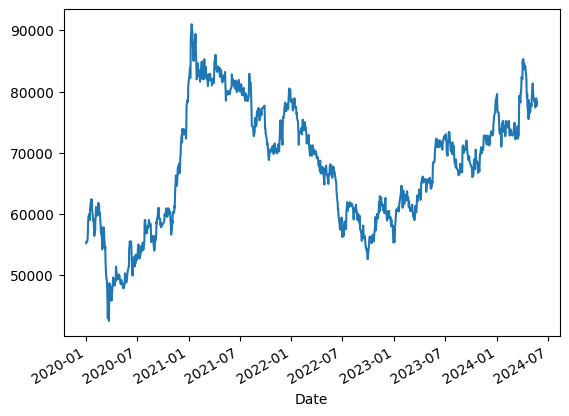

In [25]:
df.Close.plot()

In [26]:
baseline = df.Close.iloc[0]
df.Close = df.Close/baseline - 1

<Axes: xlabel='Date'>

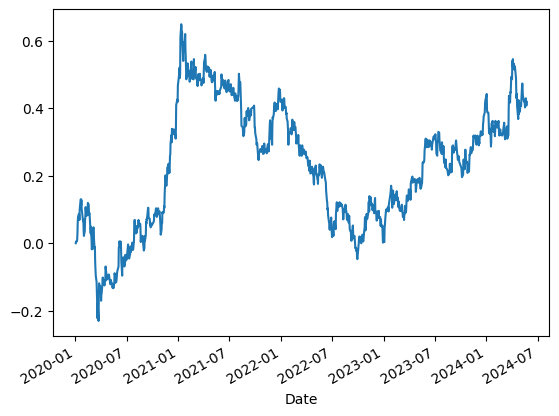

In [27]:
df.Close.plot()

In [28]:
df.Open = df.Open/baseline - 1
df.High = df.High/baseline - 1
df.Low = df.Low/baseline - 1
df.Volume = df.Volume/df.Volume.iloc[0] - 1

In [29]:
df.head()

Open      High       Low     Close    Volume
Date                                                        
2020-01-02  0.005435  0.014493 -0.003623  0.000000  0.000000
2020-01-03  0.014493  0.025362 -0.005435  0.005435  0.186946
2020-01-06 -0.005435  0.007246 -0.010870  0.005435 -0.208899
2020-01-07  0.009058  0.021739  0.007246  0.010870 -0.229616
2020-01-08  0.018116  0.039855  0.012681  0.028986  0.808725

In [43]:
def create_inputs(data, seq_len, pred_len):
    xs = []
    ys = []
    for i in range(len(data) - seq_len - pred_len + 1):
        x = data[i:i+seq_len, :]
        y = data[i+seq_len:i+seq_len+pred_len, 3]  # Close Ïª¨ÎüºÏùò Ïù∏Îç±Ïä§Í∞Ä 3
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [44]:
inputs, targets = create_inputs(df.values, seq_len=20, pred_len=5)

In [45]:
inputs.shape

(1059, 20, 5)

In [46]:
targets.shape

(1059, 5)

RNN Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html




* batch_first ‚Äì If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False

* h_n: tensor of shape
(
ùê∑
‚àó
num_layers
,
ùêª
ùëú
ùë¢
ùë°
)
(D‚àónum_layers,H
out
‚Äã
 ) for unbatched input or
(
ùê∑
‚àó
num_layers
,
ùëÅ
,
ùêª
ùëú
ùë¢
ùë°
)
(D‚àónum_layers,N,H
out
‚Äã
 ) containing the final hidden state for each element in the batch.

 * batch size
sequence length
2 if bidirectional=True otherwise 1
input_size
hidden_size
‚Äã


*  N: Î∞∞ÏπòÌÅ¨Í∏∞
 L: ÏãúÌÄÄÏä§ Í∏∏Ïù¥
 H_in: Feature Í∞úÏàò (ÏãúÍ≥ÑÏó¥ Í∏∞Ï§Ä)


Í≥ºÍ±∞ 20Ïùº Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥†, 5Ïùº ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§. Ïù¥Îïå Î™®Îì† Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©ÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥Î¥ÖÏãúÎã§

In [33]:
input_size = 5  # feature size
seq_len = 20
hidden_size = 10
num_layers = 2
prediction_len = 5

# RNN Î™®Îç∏ Ï†ïÏùò
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)   #input_sizeÎäî feature : Close 1Í∞ú
        self.linear = nn.Linear(hidden_size* seq_len, prediction_len)

    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = out.reshape(out.shape[0], -1) # many to many Ï†ÑÎûµ
        out = self.linear(out)
        return out, hidden

In [34]:
# Î™®Îç∏, ÏÜêÏã§ Ìï®Ïàò, ÏµúÏ†ÅÌôî Ìï®Ïàò Ï¥àÍ∏∞Ìôî
model = RNNModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [35]:
%pip install torchinfo

In [36]:
from torchinfo import summary
summary(model, ((1,20, 5),(2,1, 10)))   # Input: Batch, Seq, Feature, Hidden: layer, batch, H_out

Layer (type:depth-idx)                   Output Shape              Param #
RNNModel                                 [1, 5]                    --
‚îú‚îÄRNN: 1-1                               [1, 20, 10]               390
‚îú‚îÄLinear: 1-2                            [1, 5]                    1,005
Total params: 1,395
Trainable params: 1,395
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01

In [47]:
# Train, Test ÎÇòÎàÑÍ∏∞
train_size = int(len(inputs) * 0.8)
train_inputs = inputs[:train_size]
train_targets = targets[:train_size]
test_inputs = inputs[train_size:]
test_targets = targets[train_size:]

In [48]:
print(train_inputs.shape)
print(train_targets.shape)

(847, 20, 5)
(847, 5)


In [49]:
# TensorDatasetÍ≥º DataLoader ÏÉùÏÑ± (NumPy Î∞∞Ïó¥ÏùÑ Î∞îÎ°ú ÏÇ¨Ïö©)
train_dataset = TensorDataset(torch.tensor(train_inputs, dtype=torch.float32),
                              torch.tensor(train_targets, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(test_inputs, dtype=torch.float32),
                             torch.tensor(test_targets, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Îç∞Ïù¥ÌÑ∞ Î°úÎçî Ï∂úÎ†• (ÌòïÌÉú ÌôïÏù∏)
for inputs, targets in train_loader:
    print("Train batch inputs shape:", inputs.shape)  # (batch_size, 20, 1)
    print("Train batch targets shape:", targets.shape) # (batch_size,)
    break

for inputs, targets in test_loader:
    print("Test batch inputs shape:", inputs.shape)  # (batch_size, 20, 1)
    print("Test batch targets shape:", targets.shape) # (batch_size,)
    break

Train batch inputs shape: torch.Size([32, 20, 5])
Train batch targets shape: torch.Size([32, 5])
Test batch inputs shape: torch.Size([1, 20, 5])
Test batch targets shape: torch.Size([1, 5])


In [50]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [51]:
model = model.to(device)


In [52]:
# ÌïôÏäµ
epochs = 50
hidden = None  #noneÏù¥Î©¥ 0ÏúºÎ°ú Ï¥àÍ∏∞

for epoch in range(epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Î∞∞Ïπò ÌÅ¨Í∏∞Ïóê ÎßûÎäî hidden state Ï¥àÍ∏∞Ìôî
        if hidden is not None and inputs.size(0) != hidden.size(1):
            hidden = None

        # Î™®Îç∏ Ï¥àÍ∏∞Ìôî
        optimizer.zero_grad()

        # Î™®Îç∏Ïóê ÏûÖÎ†•
        outputs, hidden = model(inputs, hidden)

        # hidden stateÎ•º Ïó≠Ï†ÑÌååÏóêÏÑú Î∂ÑÎ¶¨ (detach)
        hidden = hidden.detach() if hidden is not None else None

        # ÏÜêÏã§ Í≥ÑÏÇ∞
        loss = criterion(outputs, targets)

        # Ïó≠Ï†ÑÌåå Î∞è ÏµúÏ†ÅÌôî
        loss.backward()
        optimizer.step()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [1/50], Loss: 0.1390
Epoch [1/50], Loss: 0.0891
Epoch [1/50], Loss: 0.0760
Epoch [1/50], Loss: 0.0655
Epoch [1/50], Loss: 0.0589
Epoch [1/50], Loss: 0.0477
Epoch [1/50], Loss: 0.0445
Epoch [1/50], Loss: 0.0341
Epoch [1/50], Loss: 0.0194
Epoch [1/50], Loss: 0.0410
Epoch [1/50], Loss: 0.0351
Epoch [1/50], Loss: 0.0291
Epoch [1/50], Loss: 0.0263
Epoch [1/50], Loss: 0.0307
Epoch [1/50], Loss: 0.0267
Epoch [1/50], Loss: 0.0260
Epoch [1/50], Loss: 0.0263
Epoch [1/50], Loss: 0.0249
Epoch [1/50], Loss: 0.0188
Epoch [1/50], Loss: 0.0289
Epoch [1/50], Loss: 0.0226
Epoch [1/50], Loss: 0.0133
Epoch [1/50], Loss: 0.0136
Epoch [1/50], Loss: 0.0176
Epoch [1/50], Loss: 0.0109
Epoch [1/50], Loss: 0.0168
Epoch [1/50], Loss: 0.0172
Epoch [2/50], Loss: 0.0103
Epoch [2/50], Loss: 0.0122
Epoch [2/50], Loss: 0.0131
Epoch [2/50], Loss: 0.0098
Epoch [2/50], Loss: 0.0090
Epoch [2/50], Loss: 0.0089
Epoch [2/50], Loss: 0.0123
Epoch [2/50], Loss: 0.0111
Epoch [2/50], Loss: 0.0073
Epoch [2/50], Loss: 0.0129
E

In [53]:
predictions = []
actuals = []
with torch.no_grad():
    hidden = None  # Ï¥àÍ∏∞ hidden state
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs, hidden = model(inputs, hidden)
        predictions.append(outputs.cpu().numpy())
        actuals.append(targets.cpu().numpy())


In [54]:
predictions = np.concatenate(predictions)
actuals = np.concatenate(actuals)



In [72]:
predictions.shape

(212, 5)

In [75]:
actuals.shape

(212, 5)

In [76]:
df_prediction = pd.DataFrame(predictions)
df_actuals = pd.DataFrame(actuals)

In [77]:
df_prediction

0         1         2         3         4
0    0.330177  0.330560  0.325906  0.326802  0.331249
1    0.327223  0.318665  0.322086  0.322046  0.324550
2    0.321184  0.310725  0.311578  0.311307  0.315435
3    0.302004  0.297639  0.293878  0.295475  0.299885
4    0.282882  0.279910  0.274622  0.273854  0.275882
..        ...       ...       ...       ...       ...
207  0.462219  0.453799  0.464066  0.461923  0.463260
208  0.461162  0.462505  0.452469  0.452366  0.464270
209  0.454666  0.446670  0.447638  0.451224  0.467741
210  0.435611  0.441453  0.436115  0.433446  0.441023
211  0.437778  0.443438  0.434232  0.441743  0.437688

[212 rows x 5 columns]

In [79]:
df_actuals

0         1         2         3         4
0    0.304348  0.297101  0.266304  0.259058  0.295290
1    0.297101  0.266304  0.259058  0.295290  0.302536
2    0.266304  0.259058  0.295290  0.302536  0.302536
3    0.259058  0.295290  0.302536  0.302536  0.329710
4    0.295290  0.302536  0.302536  0.329710  0.327899
..        ...       ...       ...       ...       ...
207  0.434783  0.420290  0.418478  0.416667  0.402174
208  0.420290  0.418478  0.416667  0.402174  0.429348
209  0.418478  0.416667  0.402174  0.429348  0.420290
210  0.416667  0.402174  0.429348  0.420290  0.407609
211  0.402174  0.429348  0.420290  0.407609  0.418478

[212 rows x 5 columns]

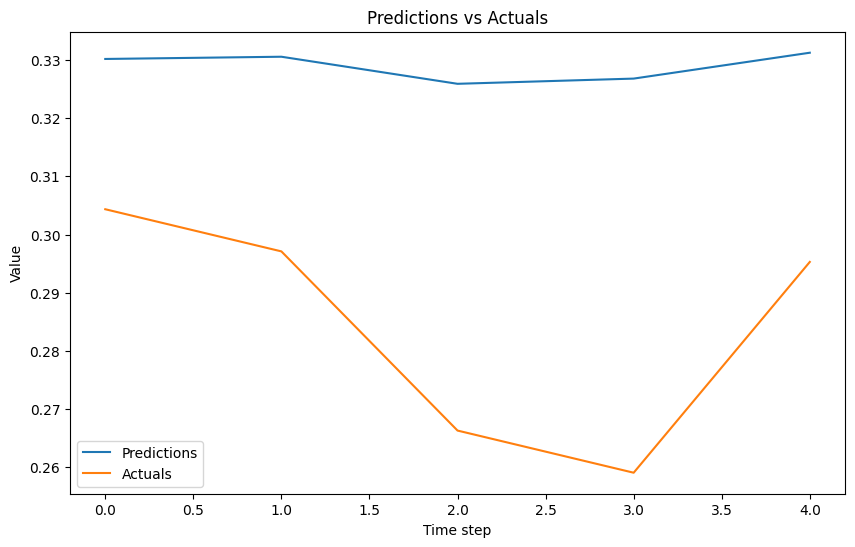

In [59]:
# ÏòàÏ∏°Í∞íÍ≥º Ïã§Ï†úÍ∞í ÏãúÍ∞ÅÌôî (Ï≤´ Î≤àÏß∏ ÏãúÌÄÄÏä§Îßå ÌîåÎ°Ø)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(predictions[0], label='Predictions')
plt.plot(actuals[0], label='Actuals')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Predictions vs Actuals')
plt.legend()
plt.show()
